In [8]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import os
import random
from PIL import Image

In [26]:
df=pd.read_csv("Train.csv")
base_path='./images/'

In [27]:
samples=20000
df=df.loc[df["id"].str.startswith('00', na=False), :]
num_classes=len(df["landmark_id"].unique())
num_data=len(df)

In [28]:
num_classes

3009

In [29]:
num_data

3155

In [30]:
data=pd.DataFrame(df["landmark_id"].value_counts())

data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982.0,9
1,2079.0,4
2,15427.0,3
3,45428.0,3
4,83144.0,3


In [31]:
data.tail()

,landmark_id,count
3004,25278.0,1
3005,27251.0,1
3006,61443.0,1
3007,183634.0,1
3008,73327.0,1


In [33]:
data.columns=['index','count']

In [32]:
data['count'].describe()

count    3009.000000
mean        1.048521
std         0.277069
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         9.000000
Name: count, dtype: float64

(array([3009.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([  0.  ,   9.94,  19.88,  29.82,  39.76,  49.7 ,  59.64,  69.58,
         79.52,  89.46,  99.4 , 109.34, 119.28, 129.22, 139.16, 149.1 ,
        159.04, 168.98, 178.92, 188.86, 198.8 , 208.74, 21

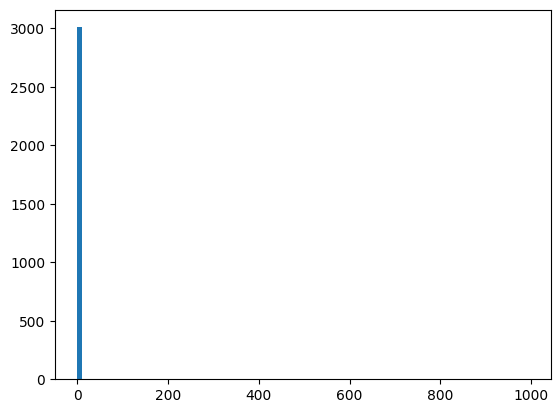

In [34]:
plt.hist(data['count'],100,range=(0,994),label='test')

In [35]:
data['count'].between(0,5).sum()

3008

In [36]:
data['count'].between(5,10).sum()

1

In [56]:
#plt.hist(df["landmark_id"],bins=df["landmark_id"].unique())

In [37]:
from sklearn.preprocessing import LabelEncoder
lencoder=LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [38]:
df.head()

,id,url,landmark_id,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
108,0036d78c05c194d9,https://upload.wikimedia.org/wikipedia/commons...,50089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,00c08b162f34f53f,https://upload.wikimedia.org/wikipedia/commons...,163404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
710,00e5d77c905d94a6,https://upload.wikimedia.org/wikipedia/commons...,26066.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2222,0082fd4214b3c2c7,https://upload.wikimedia.org/wikipedia/commons...,36407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2862,00ccb9e605722c02,http://upload.wikimedia.org/wikipedia/commons/...,117635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
def encode_label(lbl):
    return lencoder.transform(lbl)

In [40]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [45]:
def get_image_from_number(num):
    fname,label=df.loc[num ,:]
    fname=fname+'.jpg'
    f1=fname [0]
    f2=fname [1]
    f3=fname [2]
    path=os.path.join(f1, f2, f3, fname)
    im = cv2.imread(os.path.join(base_path,path)) 
    return im,label

In [97]:
print("4 Sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri =random.choices (os.listdir(base_path), k=3)
    folder = base_path + '/'+ ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random.choice(os.listdir(folder)) 
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()

4 Sample images from random classes


In [58]:
from keras.applications.vgg19 import VGG19 
from keras.layers import*
from keras import Sequential 
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Parameters
learning_rate=8.0001
decay_speed=1e-6
nomemtum=0.09
loss_function ="sparse_categorical_crossentropy"
source_model =VGG19(weights=None)
drop_layer = Dropout (0.5)
drop_layer2=Dropout(0,5)

In [96]:
optim1=keras.optimizer_v1.RMSprop(lr=learning_rate)
model.compile(optimizer-optimi, 
              loss-loss_function, 
              metrics ["accuracy"])

In [65]:
def image_reshape(im, target_size): 
    return cv2.reshape(im, target_size)


In [69]:
def get_batch(dataframe, start, batch_size):
    image_array =[]
    label_array=[]
    end_img=start+batch_size 
    if(end_img) > len(dataframe): 
        end_img=len(dataframe)

    for idx in range(start, end_img):
        n = idx
        im,label = get_image_from_number(n, dataframe) 
        im = image_reshape(im, (224, 224)) / 255.0 
        image_array.append(im) 
        label_array.append(label)

    label_array=encode_label(label_array)

    return np.array(image_array), np, array(label_array)

In [73]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1
#split train, val -np.split(df.sample(frac-1), [int(0.8*len (df))])
print(len(Train)) 
print(len(val))

In [85]:
for e in range(epochs):
    print("Epoch:"+ str (e+1)+ "/" + str(epochs))
   if epoch_shuffle:
        train = train.sample(frac- 1)

    for it in range(int(np.ceil(len(train)/batch_size))):
        X_train, y_train = get_batch(train, it*batch_size, batch_size)

    model.train_on_batch(X_train, y_train)

model.save("Model")


In [94]:
 #Test
batch_size = 16
errors=0
good_preds=[]
bad_pred = []

for it in range(int(np.ceil(len(val)/batch_size))): 
    X_val, y_val = get_batch(val, it*batch_size, batch_size)

    result = model.predict(X_val) 
    cla = np.argmax(result, axis =1)
    for idx, res in enumerate(result):
        if cla[idx] != y_val[idx]:
            errors=errors + 1
            bad_preds.append([batch_size*it +idx], cla[idx], res[cla[idx]])
        else: 
            good_preds.append([batch_size*it + idx], cla[idx], res[cla[idx]])

for i in range (1, 6):
    n=int(good_preds[0])
    img,lb1 = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)